In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import datetime
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('C:/Users/hantao/Desktop/data analysis project/Springboard_Project/Capstone1_Project/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
Unnamed: 0                        119390 non-null int64
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 no

In [4]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reservation_status_date,Date_time,Maximum_Temperature,Minimum _Temperature,Average_Temperature,Heat_Index,Precipitation(inches),Wind_Speed,Relative_Humidity,Conditions
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,2015-07-01,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,2015-07-02,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,2015-07-03,7/1/2015,74.4,63.3,67.6,68.379723,0.1,14.4,83.56,"Rain, Clear"


In [5]:
df['arrival_date_month']=df['arrival_date_month'].apply(lambda x: datetime.datetime.strptime(x, "%B"))

In [6]:
df['arrival_date_month']=pd.DatetimeIndex(df['arrival_date_month']).month

In [7]:
df=df.drop('Date_time',axis=1)

In [8]:
df['reservation_status_year']=pd.DatetimeIndex(df['reservation_status_date']).year
df['reservation_status_month']=pd.DatetimeIndex(df['reservation_status_date']).month
df['reservation_status_day']=pd.DatetimeIndex(df['reservation_status_date']).day

In [9]:
df=df.drop('reservation_status_date',axis=1)

In [10]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df=df.drop('reservation_status',axis=1)

In [12]:
y=df['is_canceled']
x=df.loc[:,df.columns!='is_canceled']

In [13]:
features=['Conditions','hotel','meal','country','market_segment',
          'distribution_channel','reserved_room_type','assigned_room_type',
          'deposit_type','customer_type']

In [14]:
x=pd.get_dummies(x,columns=features)

In [15]:
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [16]:
dt=DecisionTreeClassifier()
dt.fit(xlr,ylr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
fi_col=[]
fi=[]
for i,column in enumerate(x):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
fi_df=zip(fi_col,fi) 
fi_df=pd.DataFrame(fi_df,columns=['features','feature importance'])

In [18]:
fi_df.sort_values('feature importance',ascending=False).reset_index()

,index,features,feature importance
0,253,deposit_type_Non Refund,0.232083
1,27,reservation_status_month,0.087041
2,3,arrival_date_week_number,0.072824
3,28,reservation_status_day,0.060948
4,223,market_segment_Online TA,0.058440
...,...,...,...
254,134,country_LBN,0.000000
255,135,country_LBY,0.000000
256,136,country_LCA,0.000000
257,137,country_LIE,0.000000


In [19]:
feature_to_keep=fi_df[fi_df['feature importance']!=0]
feature_to_keep=feature_to_keep.sort_values('feature importance',ascending=False).reset_index()
feature_to_keep

,index,features,feature importance
0,253,deposit_type_Non Refund,0.232083
1,27,reservation_status_month,0.087041
2,3,arrival_date_week_number,0.072824
3,28,reservation_status_day,0.060948
4,223,market_segment_Online TA,0.058440
...,...,...,...
139,247,assigned_room_type_H,0.000032
140,191,country_SUR,0.000024
141,62,country_BIH,0.000022
142,46,country_ARG,0.000016


In [20]:
top_feature=pd.DataFrame(feature_to_keep)[0:11]
top_feature

,index,features,feature importance
0,253,deposit_type_Non Refund,0.232083
1,27,reservation_status_month,0.087041
2,3,arrival_date_week_number,0.072824
3,28,reservation_status_day,0.060948
4,223,market_segment_Online TA,0.058440
5,0,lead_time,0.052022
6,2,arrival_date_month,0.049010
7,18,total_of_special_requests,0.048982
8,175,country_PRT,0.038873
9,26,reservation_status_year,0.030978


Text(0, 0.5, 'Features')

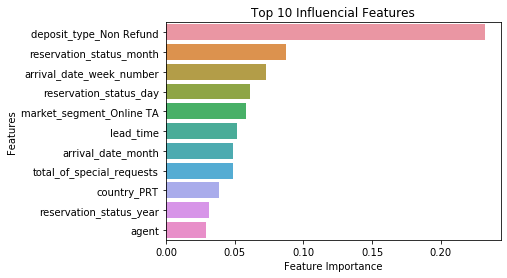

In [21]:
plot=sns.barplot(x='feature importance',y='features',data=top_feature)
plt.title('Top 10 Influencial Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

In [22]:
fi_name=feature_to_keep['features'].unique()

In [23]:
fi_list=[]
for i in fi_name:
    fi_list.append(i)

In [24]:
x=x[fi_list]


In [25]:
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [65]:
dt=DecisionTreeClassifier(random_state=0)
model=dt.fit(xlr,ylr)

In [66]:
yscore1=model.predict_proba(xtestlr)[:,1]

In [67]:
fpr1, tpr1, threshold1 = roc_curve(ytestlr, yscore1)

In [68]:
print('auc for Decision Tree: ', roc_auc_score(ytestlr, yscore1))

auc for Decision Tree:  0.9366548761839686


In [69]:
lr=LogisticRegression(random_state=0)
lrmodel=lr.fit(xlr,ylr)

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
yscore2=lrmodel.predict_proba(xtestlr)[:,1]
fpr2, tpr2, threshold1 = roc_curve(ytestlr, yscore2)
print('auc for Logistic Regression: ', roc_auc_score(ytestlr, yscore2))

auc for Logistic Regression:  0.9697728066159537


In [135]:
log_param_grid=[
    {'C':[0.001,0.01,0.1,1,10,100]}    
]

In [136]:
log_grid=GridSearchCV(lr,param_grid=log_param_grid,cv=5,verbose=True)

In [137]:
best_log_param=log_grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWar

In [139]:
best_log_param.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
best_lr=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
best_lrmodel=best_lr.fit(xlr,ylr)
yscore4=best_lrmodel.predict_proba(xtestlr)[:,1]
fpr4, tpr4, threshold1 = roc_curve(ytestlr, yscore4)
print('auc for Tunned Logistic Regression: ', roc_auc_score(ytestlr, yscore4))

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


auc for Tunned Logistic Regression:  0.9777694841630811


In [58]:
rf=RandomForestClassifier(random_state=0)
rfmodel=rf.fit(xlr,ylr)
yscore3=rfmodel.predict_proba(xtestlr)[:,1]
fpr3, tpr3, threshold1 = roc_curve(ytestlr, yscore3)
print('auc for Random Forest: ', roc_auc_score(ytestlr, yscore3))

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auc for Random Forest:  0.9753465431157451


In [142]:
rf_param1={
           'max_depth':[10,20,None],
           'n_estimators':[200,400,600]
          }

In [42]:
rf_param2={
    'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
    'n_estimators':[200,400,600,800,1000,1200,1400,1600,1800,2000],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4]
    
}

In [38]:
rf=RandomForestClassifier(random_state=0)

In [144]:
search=GridSearchCV(estimator=rf,param_grid=rf_param1,cv=5, n_jobs = -1)

In [145]:
best=search.fit(x,y)

In [146]:
best.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
rf2=RandomForestClassifier(random_state=0,n_jobs=-1)

In [44]:
search2=RandomizedSearchCV(rf2,param_distributions=rf_param2,cv=5,n_jobs=-1)

In [45]:
best2=search2.fit(x,y)

In [46]:
best2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
best_rf2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
best_rfmodel2=best_rf2.fit(xlr,ylr)
yscore7=best_rfmodel2.predict_proba(xtestlr)[:,1]
fpr7, tpr7, threshold7 = roc_curve(ytestlr, yscore7)

In [29]:
print('auc for Tunned Random Forest: ', roc_auc_score(ytestlr, yscore7))

auc for Tunned Random Forest:  0.9832854570374473


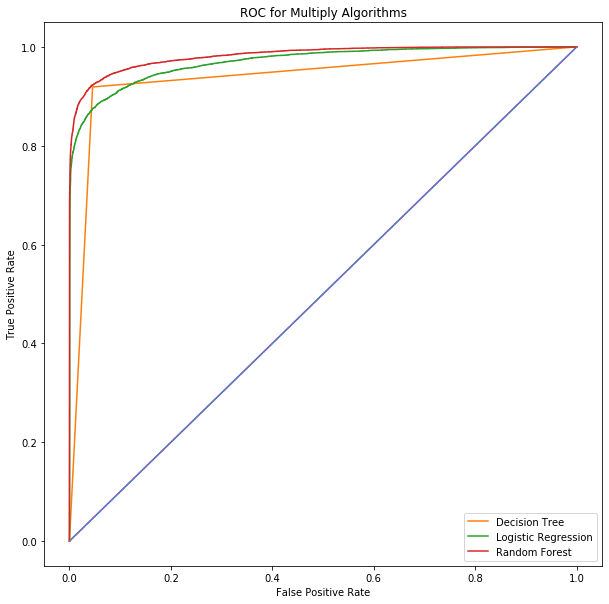

In [71]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1])
plt.title('ROC for Multiply Algorithms')
plt.plot(fpr1, tpr1,label='Decision Tree')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot(fpr7, tpr7,label='Random Forest')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()